# Pima Indian Diabetes

Pregnancies: 임신 횟수

Glucose: 포도당 부하 검사 수치

BloodPressure: 혈압(mm Hg)

SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)

Insulin: 혈청 인슐린(mu U/ml)

BMI: 체질량지수(체중(kg)/(키(m))^2)

DiabetesPedigreeFunction: 당뇨 내력 가중치 값

Age: 나이

class: 클래스 결정 값(0: 정상 , 1:당뇨)

### 데이터 출처: https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

## 필요한 모듈을 import 해줍니다.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### 데이터를 가져옵니다.

In [5]:
df =pd.read_csv("c:/000/pima-indians-diabetes.csv", header=None, 
                names=["Pregnancies",
                  "Glucose", "BloodPressure", "SkinThickness",
                  "Insulin", "BMI", "DiabetesPedigreeFunction", "age", "class"])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 데이터의 정보를 확인합니다.

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age                         0
class                       0
dtype: int64

## 그래프를 그려 상관도를 확인해봅니다.

<AxesSubplot:>

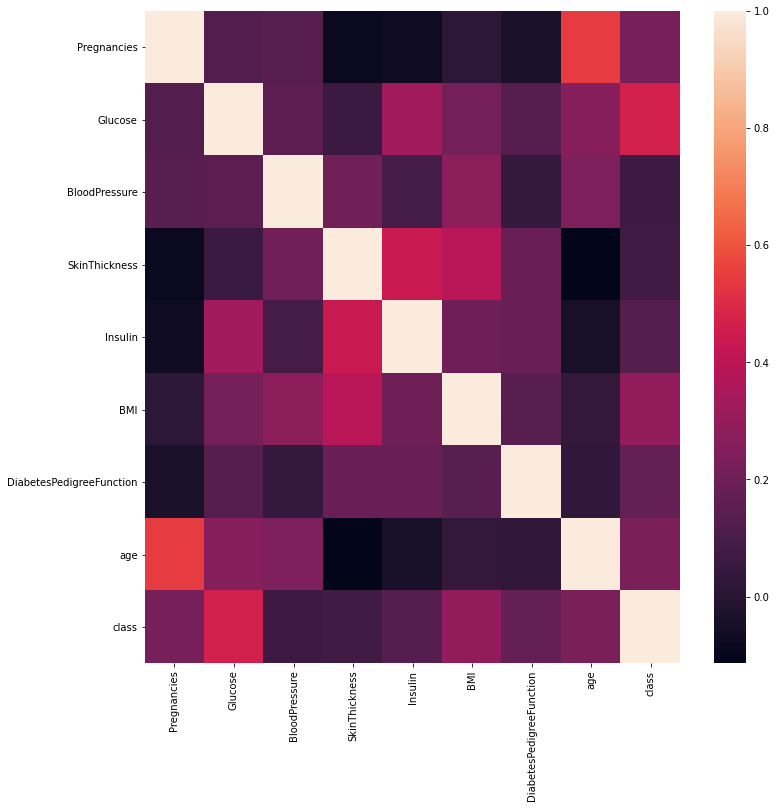

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

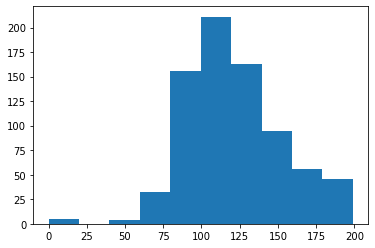

In [12]:
plt.hist(df['Glucose'], bins=10)

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

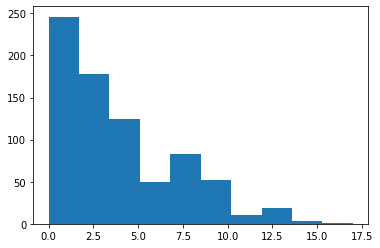

In [13]:
plt.hist(df['Pregnancies'], bins=10)

<AxesSubplot:ylabel='Count'>

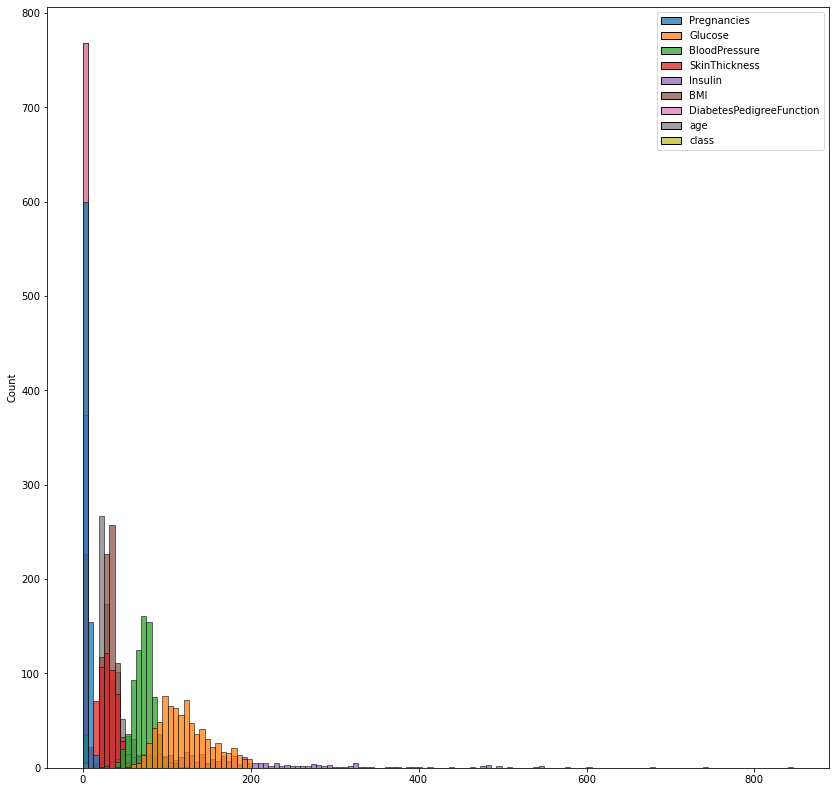

In [14]:
plt.figure(figsize=(14,14))
sns.histplot(data=df)


In [15]:
x = df.drop(columns=["class"])
y = df["class"]

In [16]:
# x_train, y_train, x_test, y_test = train_test_split(x, y ,random_state=10, test_size=0.2)

In [17]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
print("x_train.shape=", x_train.shape)
print("x_test.shape=", x_test.shape)
print("y_train.shape=", y_train.shape)
print("y_test.shape=", y_test.shape)
print(y_test[0:5])

model = Sequential()
model.add(Dense(30,input_dim=8, activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=2500, batch_size=32)

x_train.shape= (614, 8)
x_test.shape= (154, 8)
y_train.shape= (614,)
y_test.shape= (154,)
661    1
122    0
113    0
14     1
529    0
Name: class, dtype: int64
Epoch 1/2500
20/20 [==============================] - 0s 737us/step - loss: 9.5519 - accuracy: 0.3827
Epoch 2/2500
20/20 [==============================] - 0s 736us/step - loss: 1.9296 - accuracy: 0.5668
Epoch 3/2500
20/20 [==============================] - 0s 632us/step - loss: 1.5847 - accuracy: 0.5049
Epoch 4/2500
20/20 [==============================] - 0s 579us/step - loss: 1.2258 - accuracy: 0.5195
Epoch 5/2500
20/20 [==============================] - 0s 632us/step - loss: 1.0755 - accuracy: 0.5814
Epoch 6/2500
20/20 [==============================] - 0s 633us/step - loss: 0.9674 - accuracy: 0.6205
Epoch 7/2500
20/20 [==============================] - 0s 684us/step - loss: 1.0525 - accuracy: 0.6205
Epoch 8/2500
20/20 [==============================] - 0s 632us/step - loss: 0.8310 - accuracy: 0.6498
Epoch 9/2500
20/20 [===

20/20 [==============================] - 0s 685us/step - loss: 0.5136 - accuracy: 0.7280
Epoch 80/2500
20/20 [==============================] - 0s 684us/step - loss: 0.5105 - accuracy: 0.7655
Epoch 81/2500
20/20 [==============================] - 0s 684us/step - loss: 0.4986 - accuracy: 0.7655
Epoch 82/2500
20/20 [==============================] - 0s 631us/step - loss: 0.5005 - accuracy: 0.7410
Epoch 83/2500
20/20 [==============================] - 0s 684us/step - loss: 0.4966 - accuracy: 0.7492
Epoch 84/2500
20/20 [==============================] - 0s 631us/step - loss: 0.5106 - accuracy: 0.7476
Epoch 85/2500
20/20 [==============================] - 0s 684us/step - loss: 0.5432 - accuracy: 0.7394
Epoch 86/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4995 - accuracy: 0.7573
Epoch 87/2500
20/20 [==============================] - 0s 684us/step - loss: 0.6176 - accuracy: 0.7199
Epoch 88/2500
20/20 [==============================] - 0s 579us/step - loss: 0.5022 - a

20/20 [==============================] - 0s 632us/step - loss: 0.4830 - accuracy: 0.7541
Epoch 159/2500
20/20 [==============================] - 0s 579us/step - loss: 0.4839 - accuracy: 0.7606
Epoch 160/2500
20/20 [==============================] - 0s 684us/step - loss: 0.4800 - accuracy: 0.7655
Epoch 161/2500
20/20 [==============================] - 0s 579us/step - loss: 0.4871 - accuracy: 0.7769
Epoch 162/2500
20/20 [==============================] - 0s 712us/step - loss: 0.5574 - accuracy: 0.7492
Epoch 163/2500
20/20 [==============================] - 0s 737us/step - loss: 0.4757 - accuracy: 0.7606
Epoch 164/2500
20/20 [==============================] - 0s 631us/step - loss: 0.4723 - accuracy: 0.7671
Epoch 165/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4494 - accuracy: 0.7850
Epoch 166/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4463 - accuracy: 0.7818
Epoch 167/2500
20/20 [==============================] - 0s 737us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.4362 - accuracy: 0.7997
Epoch 237/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4411 - accuracy: 0.7932
Epoch 238/2500
20/20 [==============================] - 0s 685us/step - loss: 0.4382 - accuracy: 0.7899
Epoch 239/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4696 - accuracy: 0.7834
Epoch 240/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4408 - accuracy: 0.7818
Epoch 241/2500
20/20 [==============================] - 0s 631us/step - loss: 0.4409 - accuracy: 0.7932
Epoch 242/2500
20/20 [==============================] - 0s 633us/step - loss: 0.4385 - accuracy: 0.7834
Epoch 243/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4275 - accuracy: 0.8029
Epoch 244/2500
20/20 [==============================] - 0s 684us/step - loss: 0.4212 - accuracy: 0.8094
Epoch 245/2500
20/20 [==============================] - 0s 632us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.4063 - accuracy: 0.8029
Epoch 315/2500
20/20 [==============================] - 0s 633us/step - loss: 0.4135 - accuracy: 0.8013
Epoch 316/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3912 - accuracy: 0.8257
Epoch 317/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4354 - accuracy: 0.7980
Epoch 318/2500
20/20 [==============================] - 0s 631us/step - loss: 0.4346 - accuracy: 0.7850
Epoch 319/2500
20/20 [==============================] - 0s 684us/step - loss: 0.4195 - accuracy: 0.8062
Epoch 320/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4169 - accuracy: 0.8176
Epoch 321/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3980 - accuracy: 0.8176
Epoch 322/2500
20/20 [==============================] - 0s 632us/step - loss: 0.4198 - accuracy: 0.7997
Epoch 323/2500
20/20 [==============================] - 0s 579us/step - loss: 0

20/20 [==============================] - 0s 684us/step - loss: 0.4482 - accuracy: 0.7752
Epoch 393/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3854 - accuracy: 0.8176
Epoch 394/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3849 - accuracy: 0.8241
Epoch 395/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3951 - accuracy: 0.8176
Epoch 396/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3947 - accuracy: 0.8094
Epoch 397/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3980 - accuracy: 0.8257
Epoch 398/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3875 - accuracy: 0.8192
Epoch 399/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3990 - accuracy: 0.8160
Epoch 400/2500
20/20 [==============================] - 0s 631us/step - loss: 0.4003 - accuracy: 0.8029
Epoch 401/2500
20/20 [==============================] - 0s 632us/step - loss: 0

20/20 [==============================] - 0s 946us/step - loss: 0.3713 - accuracy: 0.8257
Epoch 471/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3753 - accuracy: 0.8339
Epoch 472/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3618 - accuracy: 0.8339
Epoch 473/2500
20/20 [==============================] - 0s 737us/step - loss: 0.3675 - accuracy: 0.8290
Epoch 474/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3982 - accuracy: 0.8111
Epoch 475/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3859 - accuracy: 0.8160
Epoch 476/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3635 - accuracy: 0.8420
Epoch 477/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3889 - accuracy: 0.7980
Epoch 478/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3779 - accuracy: 0.8290
Epoch 479/2500
20/20 [==============================] - 0s 632us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.3633 - accuracy: 0.8436
Epoch 549/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3580 - accuracy: 0.8469
Epoch 550/2500
20/20 [==============================] - 0s 579us/step - loss: 0.4332 - accuracy: 0.7932
Epoch 551/2500
20/20 [==============================] - 0s 579us/step - loss: 0.4291 - accuracy: 0.7866
Epoch 552/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3965 - accuracy: 0.8013
Epoch 553/2500
20/20 [==============================] - 0s 818us/step - loss: 0.4405 - accuracy: 0.7818
Epoch 554/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3913 - accuracy: 0.8143
Epoch 555/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3782 - accuracy: 0.8257
Epoch 556/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3623 - accuracy: 0.8322
Epoch 557/2500
20/20 [==============================] - 0s 684us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.3408 - accuracy: 0.8453
Epoch 627/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3581 - accuracy: 0.8257
Epoch 628/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3363 - accuracy: 0.8485
Epoch 629/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3715 - accuracy: 0.8192
Epoch 630/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3400 - accuracy: 0.8420
Epoch 631/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3578 - accuracy: 0.8355
Epoch 632/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3853 - accuracy: 0.8160
Epoch 633/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3933 - accuracy: 0.8306
Epoch 634/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3597 - accuracy: 0.8404
Epoch 635/2500
20/20 [==============================] - 0s 684us/step - loss: 0

20/20 [==============================] - 0s 579us/step - loss: 0.3524 - accuracy: 0.8388
Epoch 705/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3381 - accuracy: 0.8469
Epoch 706/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3427 - accuracy: 0.8404
Epoch 707/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3354 - accuracy: 0.8550
Epoch 708/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3631 - accuracy: 0.8274
Epoch 709/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3413 - accuracy: 0.8485
Epoch 710/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3818 - accuracy: 0.8388
Epoch 711/2500
20/20 [==============================] - 0s 580us/step - loss: 0.3455 - accuracy: 0.8453
Epoch 712/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3567 - accuracy: 0.8225
Epoch 713/2500
20/20 [==============================] - 0s 579us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.3642 - accuracy: 0.8420
Epoch 783/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3265 - accuracy: 0.8518
Epoch 784/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3398 - accuracy: 0.8436
Epoch 785/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3327 - accuracy: 0.8371
Epoch 786/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3244 - accuracy: 0.8518
Epoch 787/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3215 - accuracy: 0.8567
Epoch 788/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3462 - accuracy: 0.8257
Epoch 789/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3366 - accuracy: 0.8436
Epoch 790/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3166 - accuracy: 0.8583
Epoch 791/2500
20/20 [==============================] - 0s 633us/step - loss: 0

20/20 [==============================] - 0s 684us/step - loss: 0.3176 - accuracy: 0.8648
Epoch 861/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3290 - accuracy: 0.8404
Epoch 862/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3189 - accuracy: 0.8583
Epoch 863/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3109 - accuracy: 0.8583
Epoch 864/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3156 - accuracy: 0.8518
Epoch 865/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3221 - accuracy: 0.8518
Epoch 866/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3133 - accuracy: 0.8616
Epoch 867/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3131 - accuracy: 0.8599
Epoch 868/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3087 - accuracy: 0.8550
Epoch 869/2500
20/20 [==============================] - 0s 737us/step - loss: 0

20/20 [==============================] - 0s 632us/step - loss: 0.3284 - accuracy: 0.8534
Epoch 939/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3136 - accuracy: 0.8567
Epoch 940/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3375 - accuracy: 0.8469
Epoch 941/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3122 - accuracy: 0.8550
Epoch 942/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3136 - accuracy: 0.8485
Epoch 943/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3525 - accuracy: 0.8241
Epoch 944/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3138 - accuracy: 0.8599
Epoch 945/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3030 - accuracy: 0.8713
Epoch 946/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2948 - accuracy: 0.8616
Epoch 947/2500
20/20 [==============================] - 0s 632us/step - loss: 0

20/20 [==============================] - 0s 684us/step - loss: 0.3001 - accuracy: 0.8632
Epoch 1017/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3001 - accuracy: 0.8697
Epoch 1018/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3034 - accuracy: 0.8583
Epoch 1019/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3072 - accuracy: 0.8534
Epoch 1020/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3149 - accuracy: 0.8469
Epoch 1021/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3405 - accuracy: 0.8225
Epoch 1022/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3107 - accuracy: 0.8632
Epoch 1023/2500
20/20 [==============================] - 0s 526us/step - loss: 0.2912 - accuracy: 0.8795
Epoch 1024/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2906 - accuracy: 0.8746
Epoch 1025/2500
20/20 [==============================] - 0s 631us/step 

20/20 [==============================] - 0s 685us/step - loss: 0.3011 - accuracy: 0.8616
Epoch 1095/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3138 - accuracy: 0.8485
Epoch 1096/2500
20/20 [==============================] - 0s 580us/step - loss: 0.2989 - accuracy: 0.8697
Epoch 1097/2500
20/20 [==============================] - 0s 631us/step - loss: 0.3249 - accuracy: 0.8485
Epoch 1098/2500
20/20 [==============================] - 0s 630us/step - loss: 0.3061 - accuracy: 0.8534
Epoch 1099/2500
20/20 [==============================] - 0s 685us/step - loss: 0.2888 - accuracy: 0.8795
Epoch 1100/2500
20/20 [==============================] - 0s 737us/step - loss: 0.3307 - accuracy: 0.8339
Epoch 1101/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2888 - accuracy: 0.8697
Epoch 1102/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2805 - accuracy: 0.8779
Epoch 1103/2500
20/20 [==============================] - 0s 684us/step 

20/20 [==============================] - 0s 635us/step - loss: 0.2988 - accuracy: 0.8534
Epoch 1173/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3401 - accuracy: 0.8518
Epoch 1174/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2894 - accuracy: 0.8632
Epoch 1175/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3023 - accuracy: 0.8616
Epoch 1176/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3114 - accuracy: 0.8420
Epoch 1177/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2806 - accuracy: 0.8681
Epoch 1178/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2797 - accuracy: 0.8697
Epoch 1179/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2865 - accuracy: 0.8681
Epoch 1180/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2806 - accuracy: 0.8681
Epoch 1181/2500
20/20 [==============================] - 0s 634us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.2707 - accuracy: 0.8795
Epoch 1251/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3051 - accuracy: 0.8567
Epoch 1252/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2676 - accuracy: 0.8811
Epoch 1253/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2560 - accuracy: 0.8844
Epoch 1254/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2827 - accuracy: 0.8599
Epoch 1255/2500
20/20 [==============================] - 0s 684us/step - loss: 0.3128 - accuracy: 0.8567
Epoch 1256/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2737 - accuracy: 0.8762
Epoch 1257/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2830 - accuracy: 0.8599
Epoch 1258/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2835 - accuracy: 0.8616
Epoch 1259/2500
20/20 [==============================] - 0s 711us/step 

20/20 [==============================] - 0s 684us/step - loss: 0.2604 - accuracy: 0.8909
Epoch 1329/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2913 - accuracy: 0.8550
Epoch 1330/2500
20/20 [==============================] - 0s 685us/step - loss: 0.2644 - accuracy: 0.8827
Epoch 1331/2500
20/20 [==============================] - 0s 685us/step - loss: 0.2630 - accuracy: 0.8909
Epoch 1332/2500
20/20 [==============================] - 0s 581us/step - loss: 0.2897 - accuracy: 0.8664
Epoch 1333/2500
20/20 [==============================] - 0s 580us/step - loss: 0.2624 - accuracy: 0.8958
Epoch 1334/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2737 - accuracy: 0.8811
Epoch 1335/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2610 - accuracy: 0.8779
Epoch 1336/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2556 - accuracy: 0.8811
Epoch 1337/2500
20/20 [==============================] - 0s 684us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.2510 - accuracy: 0.8827
Epoch 1407/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2494 - accuracy: 0.8925
Epoch 1408/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2536 - accuracy: 0.8860
Epoch 1409/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2629 - accuracy: 0.8730
Epoch 1410/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2764 - accuracy: 0.8746
Epoch 1411/2500
20/20 [==============================] - 0s 659us/step - loss: 0.2553 - accuracy: 0.8876
Epoch 1412/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2959 - accuracy: 0.8534
Epoch 1413/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2776 - accuracy: 0.8827
Epoch 1414/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2752 - accuracy: 0.8844
Epoch 1415/2500
20/20 [==============================] - 0s 632us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.2464 - accuracy: 0.8941
Epoch 1484/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3070 - accuracy: 0.8697
Epoch 1485/2500
20/20 [==============================] - 0s 632us/step - loss: 0.3117 - accuracy: 0.8502
Epoch 1486/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2846 - accuracy: 0.8762
Epoch 1487/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2614 - accuracy: 0.8893
Epoch 1488/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2532 - accuracy: 0.8860
Epoch 1489/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2395 - accuracy: 0.9007
Epoch 1490/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2392 - accuracy: 0.9039
Epoch 1491/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2413 - accuracy: 0.8958
Epoch 1492/2500
20/20 [==============================] - 0s 579us/step 

20/20 [==============================] - 0s 684us/step - loss: 0.2475 - accuracy: 0.8795
Epoch 1562/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2416 - accuracy: 0.9023
Epoch 1563/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2500 - accuracy: 0.8958
Epoch 1564/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2617 - accuracy: 0.8811
Epoch 1565/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2461 - accuracy: 0.8958
Epoch 1566/2500
20/20 [==============================] - 0s 578us/step - loss: 0.2386 - accuracy: 0.8860
Epoch 1567/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2526 - accuracy: 0.8876
Epoch 1568/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2643 - accuracy: 0.8876
Epoch 1569/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2429 - accuracy: 0.8876
Epoch 1570/2500
20/20 [==============================] - 0s 579us/step 

20/20 [==============================] - 0s 633us/step - loss: 0.2372 - accuracy: 0.8941
Epoch 1640/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2581 - accuracy: 0.8941
Epoch 1641/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2604 - accuracy: 0.8811
Epoch 1642/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2729 - accuracy: 0.8730
Epoch 1643/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2735 - accuracy: 0.8827
Epoch 1644/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2536 - accuracy: 0.8844
Epoch 1645/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2425 - accuracy: 0.8860
Epoch 1646/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2593 - accuracy: 0.8958
Epoch 1647/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2343 - accuracy: 0.9055
Epoch 1648/2500
20/20 [==============================] - 0s 684us/step 

20/20 [==============================] - 0s 684us/step - loss: 0.2434 - accuracy: 0.8909
Epoch 1718/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2419 - accuracy: 0.8941
Epoch 1719/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2522 - accuracy: 0.8811
Epoch 1720/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2695 - accuracy: 0.8762
Epoch 1721/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2529 - accuracy: 0.8990
Epoch 1722/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2334 - accuracy: 0.9007
Epoch 1723/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2338 - accuracy: 0.8909
Epoch 1724/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2428 - accuracy: 0.9072
Epoch 1725/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2304 - accuracy: 0.8893
Epoch 1726/2500
20/20 [==============================] - 0s 579us/step 

20/20 [==============================] - 0s 684us/step - loss: 0.2554 - accuracy: 0.8925
Epoch 1796/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2253 - accuracy: 0.9137
Epoch 1797/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2246 - accuracy: 0.8990
Epoch 1798/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2171 - accuracy: 0.8990
Epoch 1799/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2301 - accuracy: 0.9088
Epoch 1800/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2298 - accuracy: 0.8909
Epoch 1801/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2934 - accuracy: 0.8599
Epoch 1802/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2939 - accuracy: 0.8827
Epoch 1803/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2309 - accuracy: 0.8990
Epoch 1804/2500
20/20 [==============================] - 0s 632us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.2935 - accuracy: 0.8616
Epoch 1874/2500
20/20 [==============================] - 0s 579us/step - loss: 0.3133 - accuracy: 0.8518
Epoch 1875/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3530 - accuracy: 0.8388
Epoch 1876/2500
20/20 [==============================] - 0s 949us/step - loss: 0.3035 - accuracy: 0.8697
Epoch 1877/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2523 - accuracy: 0.8893
Epoch 1878/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2705 - accuracy: 0.8827
Epoch 1879/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2425 - accuracy: 0.9023
Epoch 1880/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2342 - accuracy: 0.8941
Epoch 1881/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2380 - accuracy: 0.8990
Epoch 1882/2500
20/20 [==============================] - 0s 632us/step 

20/20 [==============================] - 0s 579us/step - loss: 0.2271 - accuracy: 0.8876
Epoch 1952/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2284 - accuracy: 0.9007
Epoch 1953/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2241 - accuracy: 0.9055
Epoch 1954/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2297 - accuracy: 0.8990
Epoch 1955/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2273 - accuracy: 0.8925
Epoch 1956/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2138 - accuracy: 0.9088
Epoch 1957/2500
20/20 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9218
Epoch 1958/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2253 - accuracy: 0.9088
Epoch 1959/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2428 - accuracy: 0.8958
Epoch 1960/2500
20/20 [==============================] - 0s 684us/step - 

20/20 [==============================] - 0s 606us/step - loss: 0.2224 - accuracy: 0.9055
Epoch 2030/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2176 - accuracy: 0.9153
Epoch 2031/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2058 - accuracy: 0.9088
Epoch 2032/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2219 - accuracy: 0.9007
Epoch 2033/2500
20/20 [==============================] - 0s 633us/step - loss: 0.3091 - accuracy: 0.8844
Epoch 2034/2500
20/20 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8453
Epoch 2035/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2374 - accuracy: 0.8876
Epoch 2036/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2526 - accuracy: 0.8958
Epoch 2037/2500
20/20 [==============================] - 0s 580us/step - loss: 0.2394 - accuracy: 0.8925
Epoch 2038/2500
20/20 [==============================] - 0s 684us/step - 

20/20 [==============================] - 0s 632us/step - loss: 0.2088 - accuracy: 0.9007
Epoch 2108/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2067 - accuracy: 0.9186
Epoch 2109/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2327 - accuracy: 0.9007
Epoch 2110/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2254 - accuracy: 0.8990
Epoch 2111/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2139 - accuracy: 0.9186
Epoch 2112/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2120 - accuracy: 0.9169
Epoch 2113/2500
20/20 [==============================] - 0s 526us/step - loss: 0.2403 - accuracy: 0.8990
Epoch 2114/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2034 - accuracy: 0.9153
Epoch 2115/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2139 - accuracy: 0.9088
Epoch 2116/2500
20/20 [==============================] - 0s 632us/step 

20/20 [==============================] - 0s 580us/step - loss: 0.1898 - accuracy: 0.9267
Epoch 2186/2500
20/20 [==============================] - 0s 684us/step - loss: 0.1967 - accuracy: 0.9251
Epoch 2187/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2026 - accuracy: 0.9202
Epoch 2188/2500
20/20 [==============================] - 0s 632us/step - loss: 0.1945 - accuracy: 0.9251
Epoch 2189/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2427 - accuracy: 0.8827
Epoch 2190/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2652 - accuracy: 0.8779
Epoch 2191/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2298 - accuracy: 0.9023
Epoch 2192/2500
20/20 [==============================] - 0s 579us/step - loss: 0.1995 - accuracy: 0.9202
Epoch 2193/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2010 - accuracy: 0.9169
Epoch 2194/2500
20/20 [==============================] - 0s 632us/step 

20/20 [==============================] - 0s 684us/step - loss: 0.2065 - accuracy: 0.9039
Epoch 2264/2500
20/20 [==============================] - 0s 579us/step - loss: 0.2741 - accuracy: 0.8941
Epoch 2265/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2342 - accuracy: 0.8990
Epoch 2266/2500
20/20 [==============================] - 0s 632us/step - loss: 0.1958 - accuracy: 0.9235
Epoch 2267/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2009 - accuracy: 0.9137
Epoch 2268/2500
20/20 [==============================] - 0s 632us/step - loss: 0.1992 - accuracy: 0.9267
Epoch 2269/2500
20/20 [==============================] - 0s 686us/step - loss: 0.2061 - accuracy: 0.9186
Epoch 2270/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2068 - accuracy: 0.9088
Epoch 2271/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2227 - accuracy: 0.9039
Epoch 2272/2500
20/20 [==============================] - 0s 737us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.2018 - accuracy: 0.9104
Epoch 2342/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2031 - accuracy: 0.9104
Epoch 2343/2500
20/20 [==============================] - 0s 789us/step - loss: 0.2034 - accuracy: 0.9202
Epoch 2344/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2065 - accuracy: 0.9007
Epoch 2345/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2436 - accuracy: 0.8909
Epoch 2346/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2337 - accuracy: 0.9039
Epoch 2347/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2061 - accuracy: 0.9104
Epoch 2348/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2079 - accuracy: 0.9104
Epoch 2349/2500
20/20 [==============================] - 0s 684us/step - loss: 0.2225 - accuracy: 0.9055
Epoch 2350/2500
20/20 [==============================] - 0s 631us/step 

20/20 [==============================] - 0s 842us/step - loss: 0.2116 - accuracy: 0.9137
Epoch 2420/2500
20/20 [==============================] - 0s 789us/step - loss: 0.2231 - accuracy: 0.9072
Epoch 2421/2500
20/20 [==============================] - 0s 631us/step - loss: 0.2157 - accuracy: 0.9023
Epoch 2422/2500
20/20 [==============================] - 0s 632us/step - loss: 0.2099 - accuracy: 0.9088
Epoch 2423/2500
20/20 [==============================] - 0s 659us/step - loss: 0.1989 - accuracy: 0.9235
Epoch 2424/2500
20/20 [==============================] - 0s 579us/step - loss: 0.1865 - accuracy: 0.9267
Epoch 2425/2500
20/20 [==============================] - 0s 684us/step - loss: 0.1883 - accuracy: 0.9267
Epoch 2426/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2084 - accuracy: 0.9055
Epoch 2427/2500
20/20 [==============================] - 0s 737us/step - loss: 0.2063 - accuracy: 0.9088
Epoch 2428/2500
20/20 [==============================] - 0s 684us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.1749 - accuracy: 0.9316
Epoch 2498/2500
20/20 [==============================] - 0s 684us/step - loss: 0.1909 - accuracy: 0.9121
Epoch 2499/2500
20/20 [==============================] - 0s 684us/step - loss: 0.1936 - accuracy: 0.9202
Epoch 2500/2500
20/20 [==============================] - 0s 633us/step - loss: 0.2055 - accuracy: 0.9055


# sklearn으로 model 만들기

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [20]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
from sklearn.metrics import classification_report

In [22]:
pred = model_lr.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# XGBboost로  model 만들기

In [23]:
from xgboost import XGBClassifier

In [28]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)


[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\qazxc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
pred = model_xgb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



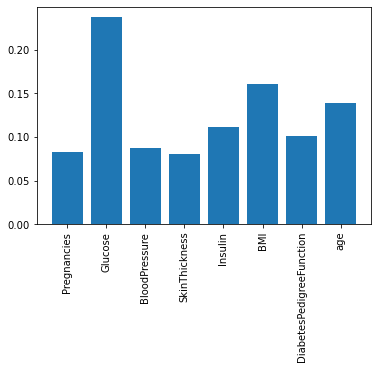

In [31]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
#어떤 feature 가 중요했는지

# plt.plot(model_xgb.feature_importances_)

#위의 껄 이쁘게 출력하기
plt.bar(x.columns,model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [32]:
from sklearn.metrics import plot_precision_recall_curve

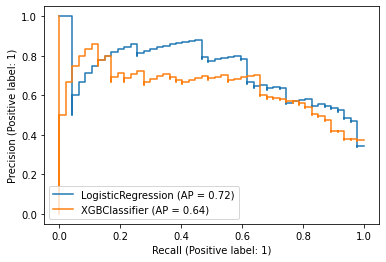

In [33]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax= fig.gca()
plot_precision_recall_curve(model_lr, x_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, x_test, y_test, ax=ax)

In [34]:
from sklearn.metrics import plot_roc_curve

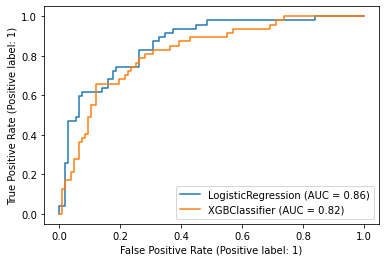

In [36]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax= fig.gca()
plot_roc_curve(model_lr, x_test, y_test, ax=ax)
plot_roc_curve(model_xgb, x_test, y_test, ax=ax)